<a href="https://colab.research.google.com/github/22500735/bigdata_pre_final_quiz_22500735/blob/main/pre_final_bigdata_quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
# [1-1] 데이터프레임으로 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('/content/서울대기오염_2019.xlsx')

# [1-2]
df = df[['날짜', '측정소명', '미세먼지', '초미세먼지']]
df.columns = ['date', 'district', 'pm10', 'pm25']

# [1-3]
print("결측치 개수:\n", df.isnull().sum())
# pm10, pm25 결측치 있는 행 제거
df = df.dropna(subset=['pm10', 'pm25'])

# [1-4]
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.dropna(subset=['date'])

df['pm10'] = df['pm10'].astype(float)
df['pm25'] = df['pm25'].astype(float)

df.reset_index(drop=True, inplace=True)

결측치 개수:
 date          0
district      0
pm10        213
pm25        203
dtype: int64


<ipython-input-61-4a0c0e65b4ba>:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


In [62]:
# [2-1]
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# [2-2]
def month_to_season(m):
    if m in [3,4,5]: return 'spring'
    if m in [6,7,8]: return 'summer'
    if m in [9,10,11]: return 'autumn'
    return 'winter'

df['season'] = df['month'].apply(month_to_season)

In [63]:
# [3-1]
df.info()
df.head()

# [3-2]
df.to_csv('card_output.csv', index=False)
print("Saved processed data to card_output.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9259 entries, 0 to 9258
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      9259 non-null   datetime64[ns]
 1   district  9259 non-null   object        
 2   pm10      9259 non-null   float64       
 3   pm25      9259 non-null   float64       
 4   month     9259 non-null   int32         
 5   day       9259 non-null   int32         
 6   season    9259 non-null   object        
dtypes: datetime64[ns](1), float64(2), int32(2), object(2)
memory usage: 434.1+ KB
Saved processed data to card_output.csv


In [64]:
# [4-1]
avg_pm10 = df['pm10'].mean()
print(f"2019년 전체 PM10 평균: {avg_pm10:.2f} ㎍/㎥")

2019년 전체 PM10 평균: 41.76 ㎍/㎥


In [65]:
# [5-1]
max_row = df.loc[df['pm10'].idxmax()]
print(f"최대 PM10 ({max_row.pm10:.1f}) 발생: {max_row.date.date()}, {max_row.district}")

최대 PM10 (228.0) 발생: 2019-03-05, 강북구


In [66]:
# [6-1]
grp = df.groupby('district')['pm10'].mean().reset_index()
# [6-2]
top5 = grp.sort_values('pm10', ascending=False).head(5)
print(top5)

   district       pm10
4       관악구  49.083601
18      양천구  47.695055
12      마포구  47.086154
3       강서구  46.504132
2       강북구  44.950685


In [67]:
# [7-1]
season_avg = df.groupby('season')[['pm10','pm25']].mean().reset_index()
# [7-2]
season_avg = season_avg.sort_values('pm10')
print(season_avg)


   season       pm10       pm25
2  summer  26.321307  18.087861
0  autumn  31.118349  15.703211
1  spring  54.088629  31.558110
3  winter  54.681682  33.660232


In [68]:
# [8-1]
def grade_pm10(x):
    if x <= 30: return 'good'
    if x <= 80: return 'normal'
    if x <= 150: return 'bad'
    return 'worse'

df['pm_grade'] = df['pm10'].apply(grade_pm10)

# [8-2]
gr = df['pm_grade'].value_counts().reset_index()
gr.columns = ['pm_grade','n']
gr['pct'] = gr['n'] / gr['n'].sum() * 100
print(gr)

  pm_grade     n        pct
0   normal  5005  54.055514
1     good  3543  38.265471
2      bad   627   6.771790
3    worse    84   0.907225


In [69]:
# [9-1]
dist = df.groupby('district')['pm_grade'].value_counts().unstack(fill_value=0)
dist['total'] = dist.sum(axis=1)
dist['good_pct'] = dist['good'] / dist['total'] * 100
# [9-2]
good_top5 = dist[['good','good_pct']].sort_values('good_pct', ascending=False).head(5)
print(good_top5.reset_index().rename(columns={'good':'n','good_pct':'pct'}))

pm_grade district    n        pct
0             용산구  196  53.994490
1              중구  169  46.301370
2             중랑구  150  46.012270
3             종로구  162  44.505495
4             도봉구  162  44.383562


<ipython-input-70-69b6ae127e72>:7: UserWarning: Glyph 13197 (\N{SQUARE MU G}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-70-69b6ae127e72>:7: UserWarning: Glyph 13221 (\N{SQUARE M CUBED}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 13197 (\N{SQUARE MU G}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 13221 (\N{SQUARE M CUBED}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


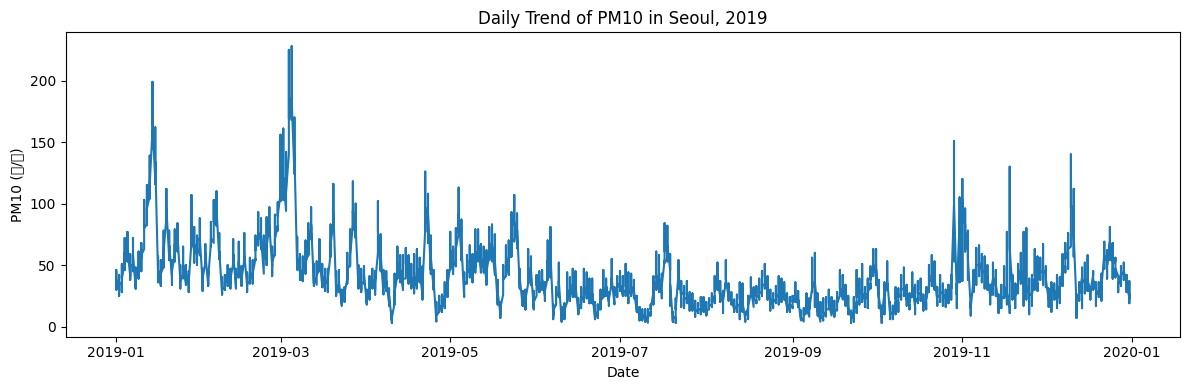

In [70]:
# [10-1]
plt.figure(figsize=(12,4))
plt.plot(df['date'], df['pm10'])
plt.title('Daily Trend of PM10 in Seoul, 2019')
plt.xlabel('Date')
plt.ylabel('PM10 (㎍/㎥)')
plt.tight_layout()
plt.show()

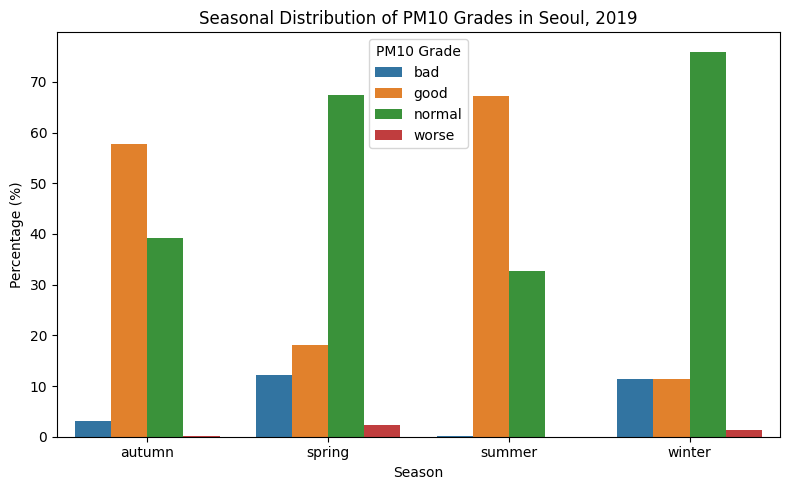

In [71]:
# [11-1]
season_dist = df.groupby(['season','pm_grade']).size().reset_index(name='n')
season_dist['pct'] = season_dist.groupby('season')['n'].transform(lambda x: x/x.sum()*100)
plt.figure(figsize=(8,5))
sns.barplot(data=season_dist, x='season', y='pct', hue='pm_grade')
plt.title('Seasonal Distribution of PM10 Grades in Seoul, 2019')
plt.xlabel('Season')
plt.ylabel('Percentage (%)')
plt.legend(title='PM10 Grade')
plt.tight_layout()
plt.show()